In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [62]:
# Dataset 5
d = 5
n = 200
x = 3 * ( np.random.rand(n, d - 1) - 0.5 )
x = np.concatenate([x.T, np.ones((1, n))]) # 5次元にすべて常に1の入力を指定（定数用）
y = (2 * x[0] - x[1] + 0.5 + 0.5 * np.random.rand(n)) > 0
y = 2 * y - 1

[[-2.02419739e-01  8.55959285e-01 -1.26836592e+00 -1.35600622e+00
  -2.00876592e-01  3.67353626e-01 -8.01720489e-01  6.66500812e-01
  -1.47858460e+00 -9.00274779e-01 -9.83856913e-01 -8.48791378e-01
   1.92133063e-01 -8.47437185e-01 -5.95457495e-01 -6.50374982e-01
   2.79716495e-01  6.00555159e-01  1.75412235e-01 -3.27976034e-01
  -5.10262897e-01  7.28837734e-01  1.42900624e+00  1.32990212e+00
  -4.91330293e-01  1.14090170e+00 -1.94914212e-01 -1.29488538e+00
  -5.24896986e-01  2.78158095e-01 -6.59950965e-01  6.58067687e-01
   2.01354253e-01  1.68299799e-01  2.94904222e-01 -1.59332683e-01
   1.16495898e+00 -6.82152436e-01  1.35896188e+00 -3.20602935e-01
  -4.13850844e-01 -9.94868767e-01 -6.10689736e-01  1.03544243e+00
  -1.30598219e+00  1.35046367e+00  1.37506878e-01 -6.19316325e-01
  -4.22740116e-01 -2.71931022e-01 -1.13833126e-01 -8.98714895e-01
   6.44520371e-02 -8.75218039e-01 -4.54721688e-01  9.07469258e-01
  -1.49189338e+00  3.40782981e-01  5.68666941e-01 -1.31502116e+00
   3.80758

In [1289]:
lam = n / 2 * 0.01

def exp(omega):
    return np.exp(- y * np.dot(omega, x))

def J(omega):
    l = np.sum(np.log(1 + exp(omega)))
    return l + lam * np.dot(omega, omega)

def gradJ(omega):
    return np.sum(exp(omega) / (1 + exp(omega)) * (-y * x), 1) + 2 * lam * omega

def gradGradJ(omega):
    c = exp(omega) / ((1 + exp(omega)) * (1 + exp(omega)))
    sum = np.zeros((d, d))
    for i in range(n):
        xi = x.T[i].reshape(d, 1)
        sum += c[i] * np.dot(xi, xi.T)
    return sum + 2 * lam * np.identity(d)

def plot(omega):
    X = np.array([-1.5, 1.5])
    Y = -omega[0] / omega[1] * X - omega[d - 1] / omega[1]
    plt.scatter(x[0] * (y + 1) / 2  , x[1] * (y + 1) / 2,   c="red")
    plt.scatter(x[0] * (y - 1) / -2 , x[1] * (y - 1) / -2,  c="blue")
    plt.plot(X, Y, c="black")

In [1290]:
maxEvals = 30
omega0 = np.random.rand(d)

# batch steepest gradient method
def steepestGradient():
    omega = omega0.copy()
    alpha = 0.05
    omegaSeries = [omega0.copy()]
    for i in range(maxEvals):
        grad = gradJ(omega)
        omega -= alpha * grad
        omegaSeries.append(omega.copy())
    plot(omega)
    return omegaSeries

# newton method
def newton():
    omega = omega0.copy()
    omegaSeries = [omega0.copy()]
    for i in range(maxEvals):
        grad = gradJ(omega)
        gradGrad = gradGradJ(omega)
        omega -=  np.dot(np.linalg.inv(gradGrad), grad)
        omegaSeries.append(omega.copy())
    plot(omega)
    return omegaSeries

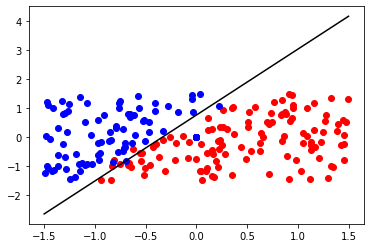

In [1291]:
newtonOmegaSeries = newton();

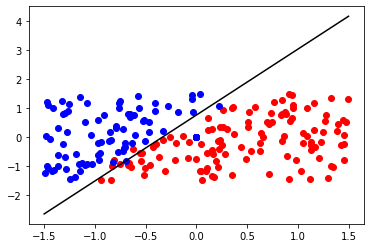

In [1292]:
steepestGradientOmegaSeries = steepestGradient();

In [1293]:
opt = min([J(steepestGradientOmegaSeries[-1]), J(newtonOmegaSeries[-1])])
steepestGradientPerformances = []
newtonPerformances = []
for index in range(maxEvals + 1):
    steepestGradientPerformances.append(np.log(np.linalg.norm(J(steepestGradientOmegaSeries[index])) - opt))
    newtonPerformances.append(np.log(np.linalg.norm(J(newtonOmegaSeries[index]) - opt)))

/tmp/ipykernel_239258/4105209108.py:6: RuntimeWarning: divide by zero encountered in log
  newtonPerformances.append(np.log(np.linalg.norm(J(newtonOmegaSeries[index]) - opt)))


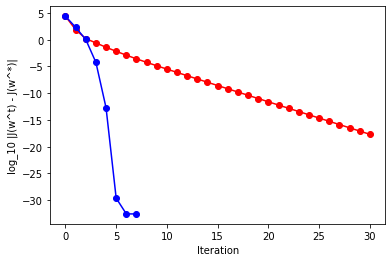

In [1294]:
plt.xlabel('Iteration')
plt.ylabel('log_10 |J(w^t) - J(w^*)|')   
plt.plot(range(maxEvals + 1), steepestGradientPerformances, c="red", marker = 'o')
plt.plot(range(maxEvals + 1), newtonPerformances, c="blue", marker = 'o')

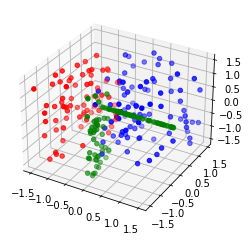

In [70]:
# Dataset 6
n = 200
d = 5
C = 3
x = 3 * ( np.random.rand(n, d - 1) - 0.5 )
W = np.array([[2, -1, 0.5], [-3, 2, 1], [1, 2, 3]])
logit = np.dot(np.insert(x[:, 0:C-1], C-1, 1, axis=1), W.T) + 0.5 * np.random.rand(n, C)
maxlogit = np.max(logit, axis=1)
y = np.argmax(logit, axis=1)
x = np.insert(x, d - 1, 1, axis=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0] * (y == 2), x[:, 1] * (y == 0), x[:, 2] * (y == 0),  c="green")
ax.scatter(x[:, 0] * (y == 1), x[:, 1] * (y == 1), x[:, 2] * (y == 1),  c="red")
ax.scatter(x[:, 0] * (y == 2), x[:, 1] * (y == 2), x[:, 2] * (y == 2),  c="blue")

In [133]:
lam = n / 2 * 0.01

def exp(omega_c, xi):
    return np.exp(np.dot(omega_c, xi))

def exp_sum(omega, xi):
    return np.sum(np.exp(np.dot(omega, xi)))

def J(omega):
    l = 0
    for index in range(n):
        xi = x[index]
        yi = y[index]
        l += - np.dot(omega[yi], xi) + np.log(exp_sum(omega, xi))
    d = 0
    for c in range(C):
        d += np.dot(omega[c], omega[c])
    return l + lam * d

def gradJ(omega, targetY):
    lGrad = np.zeros((d))
    for index in range(n):
        xi = x[index]
        yi = y[index]
        if targetY == yi:
            lGrad -= xi
            lGrad += exp(omega[yi], xi) / exp_sum(omega, xi) * xi
    return lGrad + 2 * lam * omega[targetY]

def gradGradJ(omega, targetY):
    lGradGrad = np.zeros((d, d))
    for index in range(n):
        xi = x[index]
        yi = y[index]
        if targetY == yi:
            lGradGrad += exp(omega[yi], xi) * (exp_sum(omega, xi) - exp(omega[yi], xi)) / (exp_sum(omega, xi) ** 2) * np.dot(xi.reshape(d, 1), xi.reshape(1, d))
    return lGradGrad + 2 * lam * np.identity(d)

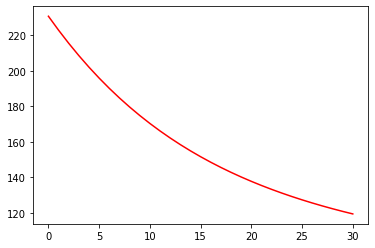

In [138]:
maxEvals = 30
omega0 = np.random.rand(C, d)

# batch steepest gradient method
def steepestGradient():
    omega = omega0.copy()
    alpha = 0.001
    omegaSeries = [omega0.copy()]
    for i in range(maxEvals):
        orgOmega = omega.copy()
        for yTarget in range(C):
            grad = gradJ(orgOmega, yTarget)
            omega[yTarget] -= alpha * grad
        omegaSeries.append(omega.copy())
    return omegaSeries

# newton method
def newton():
    omega = omega0.copy()
    omegaSeries = [omega0.copy()]
    for i in range(maxEvals):
        orgOmega = omega.copy()
        for yTarget in range(C):
            grad = gradJ(orgOmega, yTarget)
            gradGrad = gradGradJ(orgOmega, yTarget)
            omega[yTarget] -=  np.dot(np.linalg.inv(gradGrad), grad)
        omegaSeries.append(omega.copy())
    return omegaSeries



pSteepestGradient = []
for omega in steepestGradient():
    pSteepestGradient.append(J(omega))

pNewton = []
for omega in newton():
    pNewton.append(J(omega))

plt.plot(range(maxEvals + 1), pSteepestGradient, c="red")
# plt.plot(range(maxEvals + 1), pNewton, c="blue")
